# Business Case - To predict Whether the Customer is Satisfied or not based on the services provided

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Domain Analysis

In [2]:
cf = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Documents\\Study\\Dataset\\Airline_customer_satisfaction.csv")

In [3]:
cf

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
cf.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
cf.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


1) We can see there are missing values in the ArrivalDelay Column
2) The Maximum Age is 85 and Min Age is 7

In [7]:
# Importing this to avoid any warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

**Univariate Analysis**

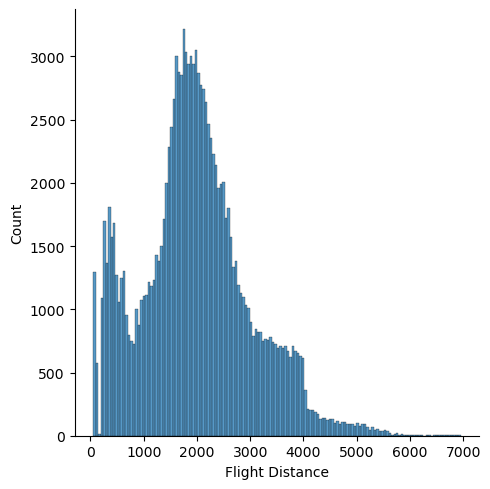

In [8]:
sns.displot(data=cf,x='Flight Distance')
plt.show()

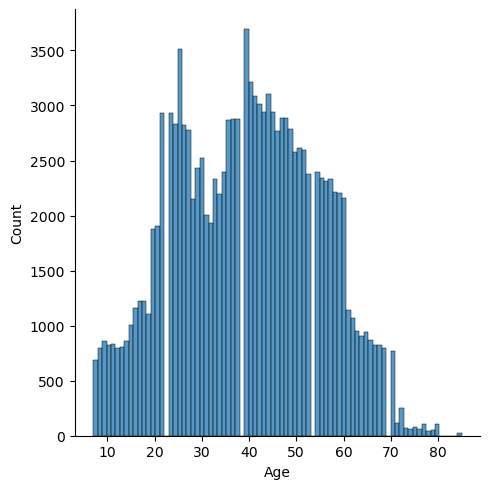

In [9]:
sns.displot(data=cf,x='Age')
plt.show()

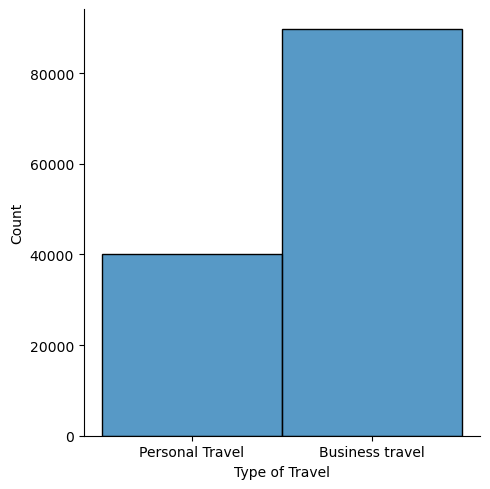

In [10]:
sns.displot(data=cf,x='Type of Travel')
plt.show()

There are more people who are travelling for business purpose

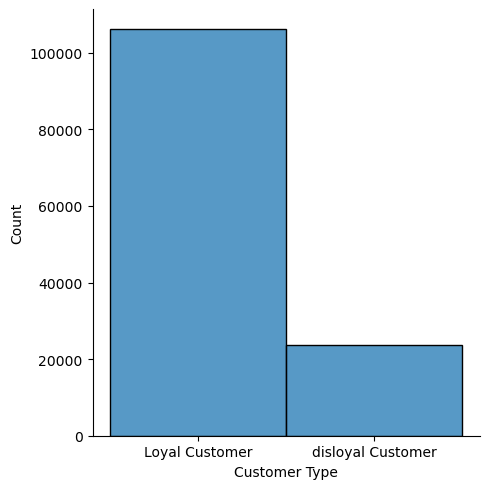

In [11]:
sns.displot(data=cf,x='Customer Type')
plt.show()

There are More no of Loyal Customers than Disloyal

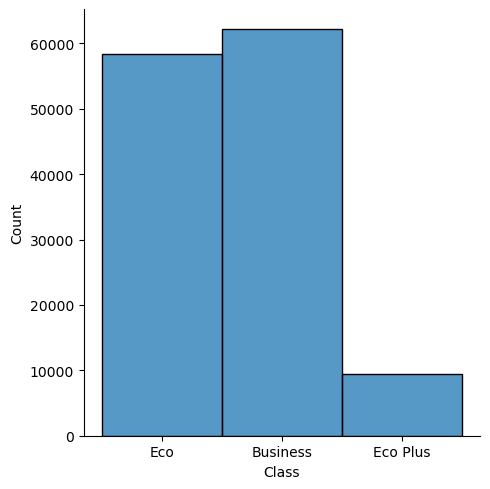

In [12]:
sns.displot(data=cf,x='Class')
plt.show()

**Bivariate Analysis**

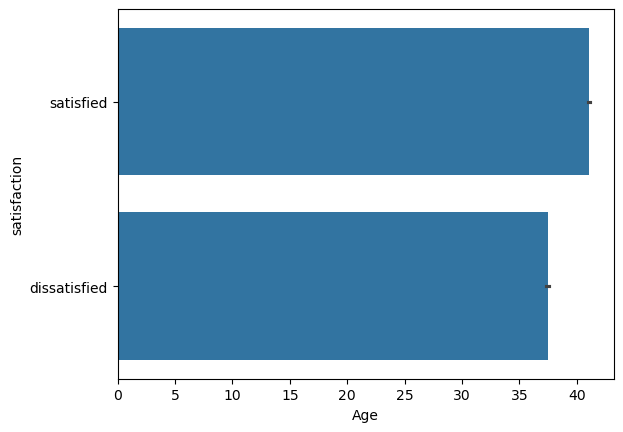

In [13]:
sns.barplot(x='Age',y='satisfaction',data=cf)
plt.show()

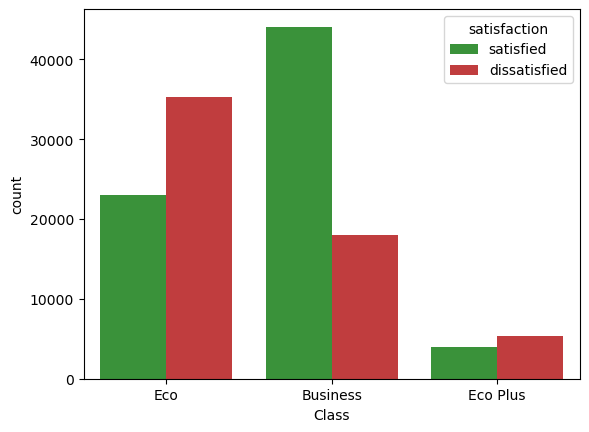

In [14]:
sns.countplot(x='Class',hue='satisfaction',data=cf,palette=['#2ca02c', '#d62728'])
plt.show()

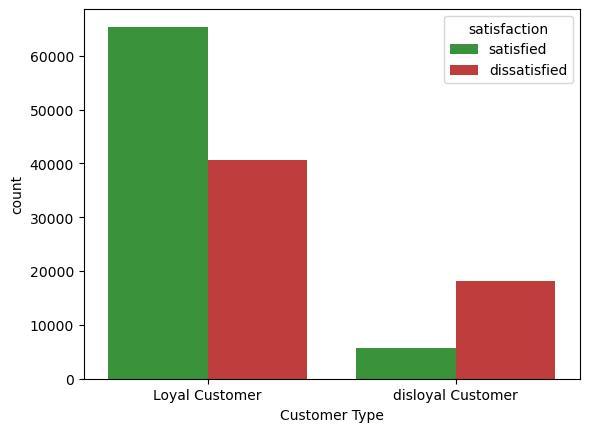

(0.0, 1.0)

In [15]:
sns.countplot(x='Customer Type',hue='satisfaction',data=cf,palette=['#2ca02c', '#d62728'])
plt.show()
plt.ylim(0)

# Data Preprocessing and Feature Engineering 

In [16]:
cf.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

We can see There are missing Values only in one column , Arrival Delay In Minutes

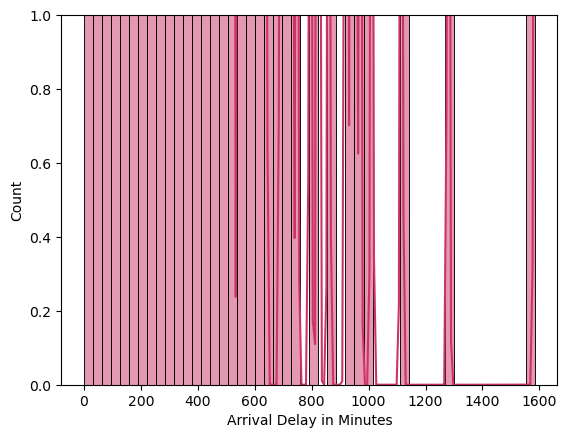

In [17]:
delay_data = cf.dropna(subset=['Arrival Delay in Minutes'])
sns.histplot(data=delay_data,x='Arrival Delay in Minutes',bins=50,color='#cc3366',edgecolor='black',kde=True)
plt.show()

This shows that the graph is highly Right Skewed

In [18]:
# Calculate the Median of the non-missing values (which is 0.0)
median_delay = cf['Arrival Delay in Minutes'].median()

In [19]:
#Filling the missing values with the meadian of that column and saving it in a new dataframe
cf_imputed = cf.copy()
cf_imputed['Arrival Delay in Minutes'] = cf_imputed['Arrival Delay in Minutes'].fillna(median_delay)

In [20]:
cf_imputed.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

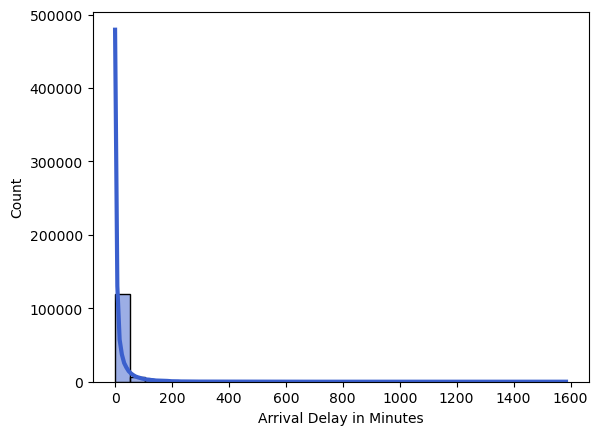

In [21]:
sns.histplot(data=cf_imputed,x='Arrival Delay in Minutes',bins=30,kde=True,color='#3A5FCD',line_kws={'linewidth': 3, 'color': 'red'})
plt.show()

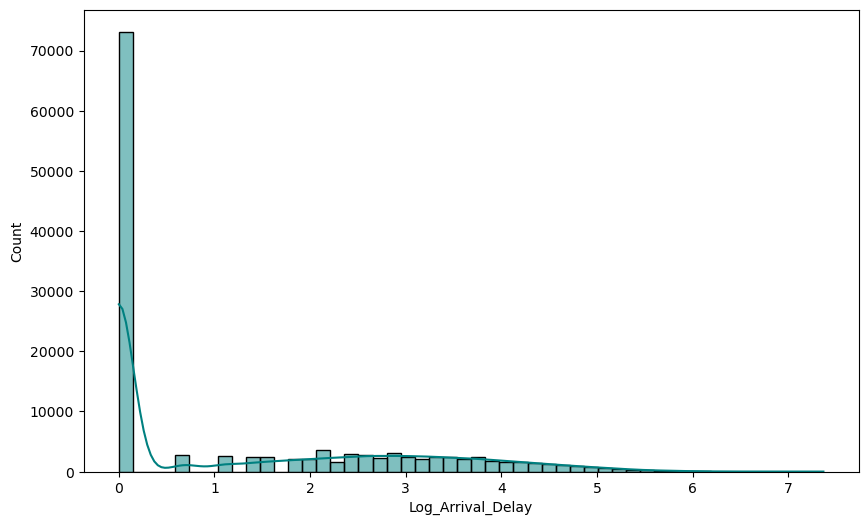

In [22]:
delay_data = cf_imputed.dropna(subset=['Arrival Delay in Minutes'])
delay_data['Log_Arrival_Delay'] = np.log1p(delay_data['Arrival Delay in Minutes'])

# Plot the new log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='Log_Arrival_Delay',bins=50,kde=True,color='#008080',edgecolor='black')
plt.show()

**Checking for Outliers**

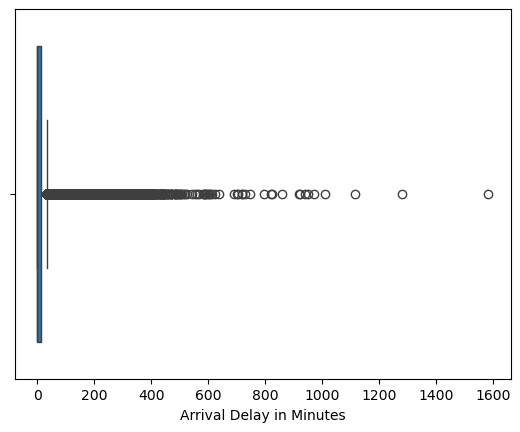

In [23]:
sns.boxplot(data=cf_imputed,x='Arrival Delay in Minutes')
plt.show()


In [24]:
Q1 =cf_imputed['Arrival Delay in Minutes'].quantile(0.25)
Q3 =cf_imputed['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cf_imputed = cf_imputed[(cf_imputed['Arrival Delay in Minutes'] >= lower_bound) & (cf_imputed['Arrival Delay in Minutes'] <= upper_bound)]

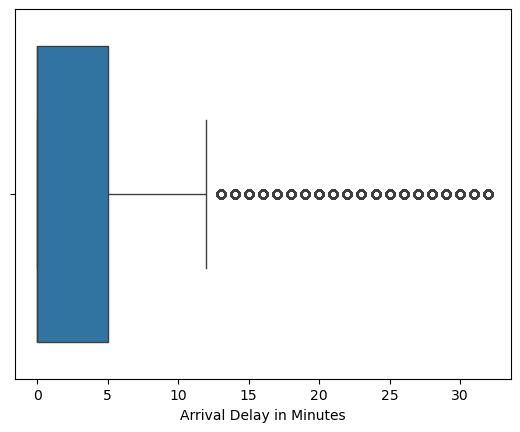

In [25]:
sns.boxplot(data=cf_imputed,x='Arrival Delay in Minutes')
plt.show()

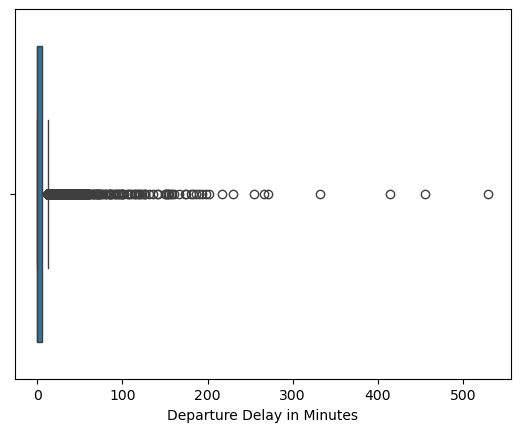

In [26]:
sns.boxplot(data=cf_imputed,x='Departure Delay in Minutes')
plt.show()

In [27]:
Q1 =cf_imputed['Departure Delay in Minutes'].quantile(0.25)
Q3 =cf_imputed['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cf_imputed = cf_imputed[(cf_imputed['Departure Delay in Minutes'] >= lower_bound) & (cf_imputed['Departure Delay in Minutes'] <= upper_bound)]

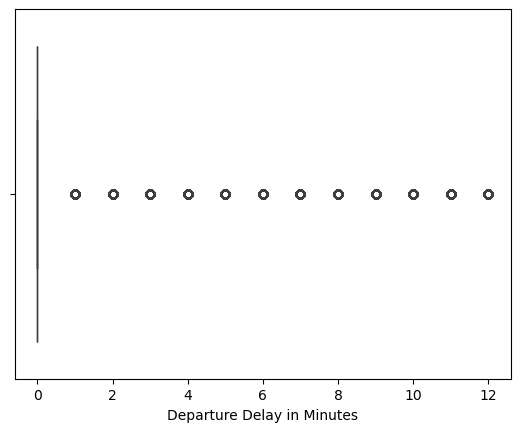

In [28]:
sns.boxplot(data=cf_imputed,x='Departure Delay in Minutes')
plt.show()

In [29]:
cf.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


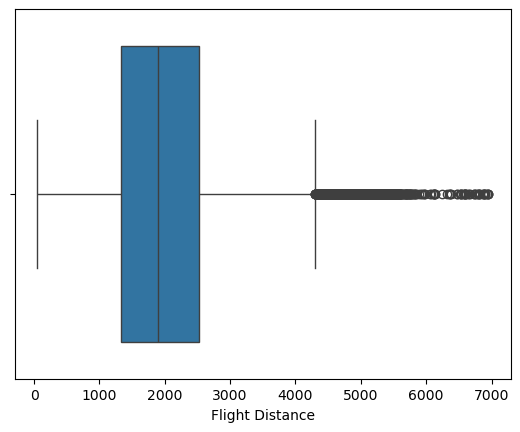

In [30]:
sns.boxplot(data=cf_imputed,x='Flight Distance')
plt.show()

In [31]:
Q1 =cf_imputed['Flight Distance'].quantile(0.25)
Q3 =cf_imputed['Flight Distance'].quantile(0.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cf_imputed = cf_imputed[(cf_imputed['Flight Distance'] >= lower_bound) & (cf_imputed['Flight Distance'] <= upper_bound)]

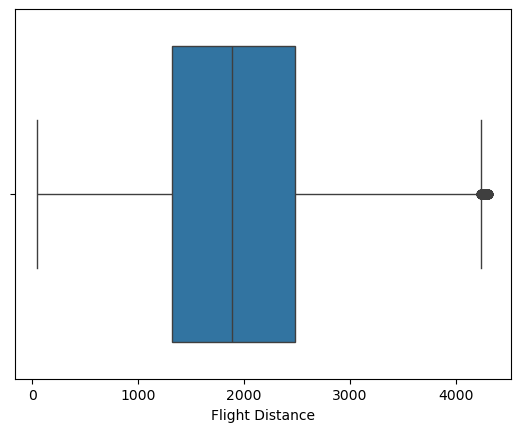

In [32]:
sns.boxplot(data=cf_imputed,x='Flight Distance')
plt.show()

All the outliers are removed , and no other columns have Outliers

In [33]:
cf['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [34]:
cf['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [35]:
cf['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

As we Know there are 4 columns with categorical values , so we will have to convert it into numerical values

* We will use Label Encoder for satisfaction column,It will convert satisfied into 1 and dissatisfied into 0.
* Customer type and Typeof travel does not follow any Order and also Binary encoder cannot be used, so We will Use One Hot encoding which will create dummy columns
* Class column follows a ranking model , so we will use Ordinal Encoding for that which converts Eco to 0, Eco plus to 1, Business to 2.

In [36]:
#Importing LabelEncoder for Encoding
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()

In [37]:
cf.satisfaction

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129875       satisfied
129876    dissatisfied
129877    dissatisfied
129878    dissatisfied
129879    dissatisfied
Name: satisfaction, Length: 129880, dtype: object

In [38]:
#Converting Values
cf_imputed['satisfaction'] = lb.fit_transform(cf_imputed.satisfaction)

In [39]:
cf_imputed['satisfaction'].unique()

array([1, 0])

In [40]:
# Using One Hot encoding Method Manually 
CustomerType = pd.get_dummies(cf_imputed['Customer Type'],dtype=int)
Typetravel = pd.get_dummies(cf_imputed['Type of Travel'],dtype=int)

In [41]:
CustomerType

,Loyal Customer,disloyal Customer
0,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
129871,0,1
129872,0,1
129873,0,1
129874,0,1


In [42]:
Typetravel

,Business travel,Personal Travel
0,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
129871,0,1
129872,0,1
129873,0,1
129874,0,1


In [43]:
#Merging both tables
cf_imputed = pd.concat([CustomerType,cf_imputed],axis=1)
cf_imputed = pd.concat([Typetravel,cf_imputed],axis=1)

In [44]:
cf_imputed

,Business travel,Personal Travel,Loyal Customer,disloyal Customer,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,1,Loyal Customer,65,Personal Travel,Eco,265,...,2,3,3,0,3,5,3,2,0,0.0
2,0,1,1,0,1,Loyal Customer,15,Personal Travel,Eco,2138,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,1,0,1,Loyal Customer,60,Personal Travel,Eco,623,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,1,0,1,Loyal Customer,70,Personal Travel,Eco,354,...,4,2,2,0,2,4,2,5,0,0.0
5,0,1,1,0,1,Loyal Customer,30,Personal Travel,Eco,1894,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,0,1,0,1,1,disloyal Customer,35,Personal Travel,Eco,3287,...,2,2,4,5,4,4,3,2,9,0.0
129872,0,1,0,1,1,disloyal Customer,69,Personal Travel,Eco,2240,...,4,4,5,4,4,3,4,4,4,0.0
129873,0,1,0,1,1,disloyal Customer,63,Personal Travel,Eco,1942,...,3,3,5,2,5,3,5,3,7,0.0
129874,0,1,0,1,1,disloyal Customer,11,Personal Travel,Eco,2752,...,2,2,3,5,3,5,4,2,5,0.0


In [45]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [46]:
#Doing Label or Ordinal Encoding for CLass
cf_imputed['Class'] = lb.fit_transform(cf_imputed.Class)

In [47]:
cf_imputed

,Business travel,Personal Travel,Loyal Customer,disloyal Customer,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,1,Loyal Customer,65,Personal Travel,1,265,...,2,3,3,0,3,5,3,2,0,0.0
2,0,1,1,0,1,Loyal Customer,15,Personal Travel,1,2138,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,1,0,1,Loyal Customer,60,Personal Travel,1,623,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,1,0,1,Loyal Customer,70,Personal Travel,1,354,...,4,2,2,0,2,4,2,5,0,0.0
5,0,1,1,0,1,Loyal Customer,30,Personal Travel,1,1894,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,0,1,0,1,1,disloyal Customer,35,Personal Travel,1,3287,...,2,2,4,5,4,4,3,2,9,0.0
129872,0,1,0,1,1,disloyal Customer,69,Personal Travel,1,2240,...,4,4,5,4,4,3,4,4,4,0.0
129873,0,1,0,1,1,disloyal Customer,63,Personal Travel,1,1942,...,3,3,5,2,5,3,5,3,7,0.0
129874,0,1,0,1,1,disloyal Customer,11,Personal Travel,1,2752,...,2,2,3,5,3,5,4,2,5,0.0


In [48]:
cf_imputed['Class'].unique()

array([1, 0, 2])

In [49]:
#As we created dummy table so the original column is not required
cf_imputed.drop(["Customer Type","Type of Travel"],axis=1,inplace=True) 

In [50]:
cf_imputed

,Business travel,Personal Travel,Loyal Customer,disloyal Customer,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,1,65,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,0,1,1,0,1,15,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,1,0,1,60,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,1,0,1,70,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,0,1,1,0,1,30,1,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,0,1,0,1,1,35,1,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,0,1,0,1,1,69,1,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,0,1,0,1,1,63,1,1942,5,5,...,3,3,5,2,5,3,5,3,7,0.0
129874,0,1,0,1,1,11,1,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [51]:
cf_imputed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 94824 entries, 0 to 129875
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Business travel                    94824 non-null  int64  
 1   Personal Travel                    94824 non-null  int64  
 2   Loyal Customer                     94824 non-null  int64  
 3   disloyal Customer                  94824 non-null  int64  
 4   satisfaction                       94824 non-null  int64  
 5   Age                                94824 non-null  int64  
 6   Class                              94824 non-null  int64  
 7   Flight Distance                    94824 non-null  int64  
 8   Seat comfort                       94824 non-null  int64  
 9   Departure/Arrival time convenient  94824 non-null  int64  
 10  Food and drink                     94824 non-null  int64  
 11  Gate location                      94824 non-null  int64  

# Feature Selection

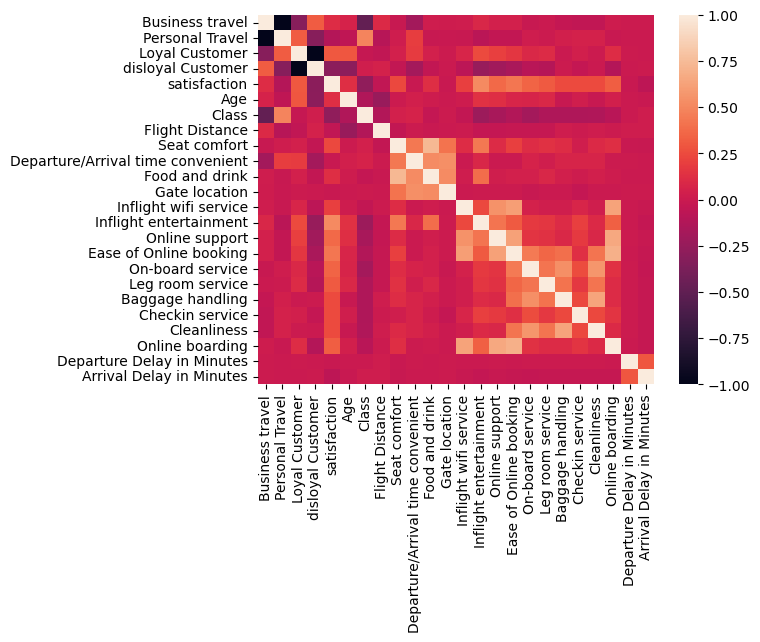

In [52]:
#Showing Correlation
sns.heatmap(data=cf_imputed.corr())
plt.show()

In [53]:
cf_imputed.corr()

,Business travel,Personal Travel,Loyal Customer,disloyal Customer,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Business travel,1.000000,-1.000000,-0.314455,0.314455,0.113231,0.055810,-0.488729,0.100837,-0.019122,-0.192745,...,0.046783,0.040328,-0.020927,-0.000570,-0.038775,-0.053471,-0.050298,0.013757,0.000261,0.005519
Personal Travel,-1.000000,1.000000,0.314455,-0.314455,-0.113231,-0.055810,0.488729,-0.100837,0.019122,0.192745,...,-0.046783,-0.040328,0.020927,0.000570,0.038775,0.053471,0.050298,-0.013757,-0.000261,-0.005519
Loyal Customer,-0.314455,0.314455,1.000000,-1.000000,0.302234,0.293527,-0.031023,-0.048492,0.045906,0.185454,...,0.195832,0.161071,0.086240,0.103558,-0.000972,0.035289,0.002266,0.114114,0.003546,-0.001110
disloyal Customer,0.314455,-0.314455,-1.000000,1.000000,-0.302234,-0.293527,0.031023,0.048492,-0.045906,-0.185454,...,-0.195832,-0.161071,-0.086240,-0.103558,0.000972,-0.035289,-0.002266,-0.114114,-0.003546,0.001110
satisfaction,0.113231,-0.113231,0.302234,-0.302234,1.000000,0.119849,-0.273481,-0.052190,0.238120,-0.013634,...,0.374974,0.423779,0.346760,0.305417,0.248341,0.245933,0.242686,0.322948,-0.011978,-0.066713
Age,0.055810,-0.055810,0.293527,-0.293527,0.119849,1.000000,-0.132262,-0.237364,0.005962,0.037358,...,0.124634,0.074450,0.067857,0.087901,-0.015783,0.027268,-0.017218,0.038414,-0.002212,-0.012056
Class,-0.488729,0.488729,-0.031023,0.031023,-0.273481,-0.132262,1.000000,-0.119252,0.044298,0.056510,...,-0.171868,-0.124448,-0.180093,-0.137094,-0.138883,-0.139825,-0.130375,-0.091574,-0.007715,0.018975
Flight Distance,0.100837,-0.100837,-0.048492,0.048492,-0.052190,-0.237364,-0.119252,1.000000,-0.040336,0.001418,...,-0.035327,-0.027022,-0.024810,-0.030237,0.020390,0.006436,0.021536,0.002476,0.021144,0.020541
Seat comfort,-0.019122,0.019122,0.045906,-0.045906,0.238120,0.005962,0.044298,-0.040336,1.000000,0.437080,...,0.104721,0.203040,0.114686,0.134765,0.110073,0.028321,0.101107,0.118157,-0.013553,-0.021471
Departure/Arrival time convenient,-0.192745,0.192745,0.185454,-0.185454,-0.013634,0.037358,0.056510,0.001418,0.437080,1.000000,...,-0.002321,-0.001601,0.061918,0.027251,0.064866,0.063318,0.067470,0.000147,0.000297,-0.003160


# Model Creation

In [54]:
X = cf_imputed.drop("satisfaction",axis=1)

In [55]:
Y = cf_imputed[['satisfaction']]

In [56]:
X

,Business travel,Personal Travel,Loyal Customer,disloyal Customer,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,65,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,0,1,1,0,15,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,1,0,60,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,1,0,70,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,0,1,1,0,30,1,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,0,1,0,1,35,1,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,0.0
129872,0,1,0,1,69,1,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,0.0
129873,0,1,0,1,63,1,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,0.0
129874,0,1,0,1,11,1,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [57]:
Y

,satisfaction
0,1
2,1
3,1
4,1
5,1
...,...
129871,1
129872,1
129873,1
129874,1


In [58]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=10)

In [59]:
X_train # Training Input Values


,Business travel,Personal Travel,Loyal Customer,disloyal Customer,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
103199,1,0,1,0,55,2,92,4,5,3,...,4,4,4,4,4,1,4,4,0,0.0
35343,0,1,1,0,39,1,1727,4,4,4,...,5,5,3,4,4,1,4,5,0,0.0
8392,0,1,1,0,67,1,2133,2,1,1,...,5,5,1,3,2,1,3,5,0,0.0
52259,1,0,0,1,50,0,1503,3,3,3,...,4,3,4,3,4,3,4,3,1,16.0
21696,0,1,1,0,30,1,2795,1,1,1,...,4,5,5,5,5,3,5,3,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,0,1,1,0,18,2,1516,2,4,2,...,2,2,3,4,4,4,5,2,7,6.0
128163,1,0,1,0,30,0,2874,5,3,5,...,5,5,3,5,4,3,4,5,4,8.0
68333,1,0,1,0,28,0,2055,1,2,2,...,1,1,4,3,4,3,4,1,0,0.0
129760,0,1,0,1,49,1,4092,0,2,1,...,3,2,1,1,4,4,3,2,0,0.0


In [60]:
Y_train # Training Output values


,satisfaction
103199,1
35343,1
8392,0
52259,0
21696,1
...,...
12762,0
128163,1
68333,0
129760,1


In [61]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
Y_predict = LR.predict(X_test) # predicting values


In [63]:
Y_predict # predicted Values

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
Y_test # Actual Values

,satisfaction
127141,1
115051,1
101168,1
94170,1
32229,1
...,...
53903,0
9876,0
35661,0
48308,0


In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Accuracy = accuracy_score(Y_predict,Y_test)

In [66]:
Accuracy

0.8045346691273398

**The model correctly predicted the outcome for 80.45% of all customers**

In [67]:
CM = confusion_matrix(Y_predict,Y_test)

In [68]:
CM

array([[5955, 1566],
       [2141, 9303]])

This Confusion Matrix tells that 

1. True Negatives (5955) - These are cases where the actual class was Negative,and the model correctly Predicted Negative.
2. False Negatives (2141) - These are cases where the actual class was Positive but the model incorrectly predicted Negative
3. False Positives (1566) - These are cases where the actual class was Negative but the model incorrectly predicted Positive
4. True Positives (9303) - These are cases where the actual class was Positive,and the model correctly Predicted Positive.

In [69]:
CR = classification_report(Y_predict,Y_test)


In [70]:
CR

'              precision    recall  f1-score   support\n\n           0       0.74      0.79      0.76      7521\n           1       0.86      0.81      0.83     11444\n\n    accuracy                           0.80     18965\n   macro avg       0.80      0.80      0.80     18965\nweighted avg       0.81      0.80      0.81     18965\n'

In [71]:
Y_train_pred = LR.predict(X_train)
train_score = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_score}")

Training Accuracy: 0.8029106632041023


In [72]:
Y_test_pred = LR.predict(X_test)
test_score = accuracy_score(Y_test, Y_test_pred)
print(f"Testing Accuracy: {test_score}")

Testing Accuracy: 0.8045346691273398


# DONE